<a href="https://colab.research.google.com/github/mirudula009/Image-Recognition/blob/main/Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, LeakyReLU, Dense, Dropout
import tensorflow as tf 

import os
#print(os.listdir("../input"))

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
train_path = 'gdrive/My Drive/image_dataset/train'
test_path = 'gdrive/My Drive/image_dataset/test'
#check data shape


In [4]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

In [5]:
train = datagen.flow_from_directory(train_path,target_size=(48,48),class_mode="sparse", seed=1, color_mode="grayscale", batch_size=128)
test = datagen.flow_from_directory(test_path,target_size=(48,48),class_mode="sparse", seed=1, color_mode="grayscale", batch_size=128)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
dir(train)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',
 'save_to_dir',
 'see

In [7]:
print(train.class_indices)
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [8]:
x, y = train.next()
print(x.shape, y.shape)
train.reset()

(128, 48, 48, 1) (128,)


In [9]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(48,48,1),padding="same"),
    LeakyReLU(),
    Conv2D(32, (3,3), padding="same"),
    LeakyReLU(),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    
    Conv2D(64,(3,3),padding="same"),
    LeakyReLU(),
    Conv2D(64,(3,3), padding="same"),
    LeakyReLU(),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

     Conv2D(128,(3,3),padding="same"),
    LeakyReLU(),
    Conv2D(128,(3,3), padding="same"),
    LeakyReLU(),
    Conv2D(128,(3,3), padding="same"),
    LeakyReLU(),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    
    Flatten(),
#     tf.keras.layers.GlobalAveragePooling2D(),
#     Dropout(0.4),
    
    Dense(128, activation='relu'),
    Dropout(0.4),

    Dense(len(train.class_indices), activation="softmax")
])
model.summary()
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                      

In [10]:
net = Sequential(name='DCNN')

net.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        input_shape=(48, 48, 1),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_1'
    )
)

net.add(BatchNormalization(name='batchnorm_1'))
net.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_2'
    )
)
net.add(BatchNormalization(name='batchnorm_2'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
net.add(Dropout(0.4, name='dropout_1'))

net.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_3'
    )
)
net.add(BatchNormalization(name='batchnorm_3'))
net.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_4'
    )

                           
)
net.add(BatchNormalization(name='batchnorm_4'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
net.add(Dropout(0.4, name='dropout_2'))

net.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_5'
    )
)

net.add(BatchNormalization(name='batchnorm_5'))
net.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_6'
    )
)
net.add(BatchNormalization(name='batchnorm_6'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
net.add(Dropout(0.5, name='dropout_3'))

net.add(Flatten(name='flatten'))

net.add(
    Dense(
        128,
        activation='elu',
        kernel_initializer='he_normal',
        name='dense_1'
    )
)
net.add(BatchNormalization(name='batchnorm_7'))

net.add(Dropout(0.6, name='dropout_4'))

net.add(
    Dense(
        7,
        activation='softmax',
        name='out_layer'
    )
)

net.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

net.summary()


Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0      

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

20 epoch takes at least 15hours to execute 

In [13]:
model.fit(train, validation_data=test, epochs=20, callbacks=callbacks)


Epoch 1/20
225/225 [==============================] - 6368s 28s/step - loss: 1.9807 - accuracy: 0.2181 - val_loss: 2.1708 - val_accuracy: 0.2471 - lr: 1.0000e-04
Epoch 2/20
225/225 [==============================] - 627s 3s/step - loss: 1.8037 - accuracy: 0.2582 - val_loss: 2.2809 - val_accuracy: 0.2060 - lr: 1.0000e-04
Epoch 3/20
225/225 [==============================] - 629s 3s/step - loss: 1.7453 - accuracy: 0.2951 - val_loss: 1.6451 - val_accuracy: 0.3546 - lr: 1.0000e-04
Epoch 4/20
225/225 [==============================] - 631s 3s/step - loss: 1.6894 - accuracy: 0.3290 - val_loss: 1.5576 - val_accuracy: 0.3916 - lr: 1.0000e-04
Epoch 5/20
225/225 [==============================] - 628s 3s/step - loss: 1.6400 - accuracy: 0.3525 - val_loss: 1.5468 - val_accuracy: 0.4068 - lr: 1.0000e-04
Epoch 6/20
225/225 [==============================] - 627s 3s/step - loss: 1.5924 - accuracy: 0.3786 - val_loss: 1.5257 - val_accuracy: 0.4213 - lr: 1.0000e-04
Epoch 7/20
225/225 [==================

In [14]:
model.save('63.h5')

In [15]:
x,y = test.next()
preds = model.predict(x)
idx = np.argmax(preds, axis = 1)
# idx.shape
print('correct prediction:', np.sum((y == idx)*1)/128)

correct prediction: 0.5390625


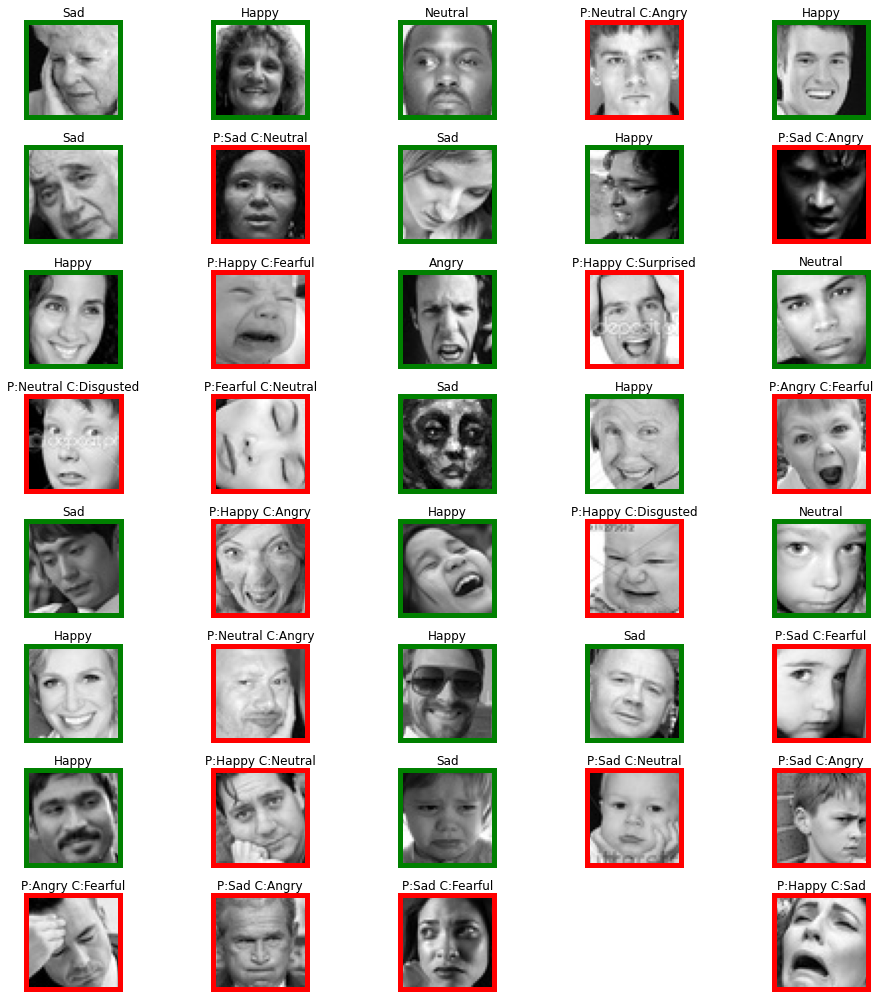

In [46]:
fig = plt.figure(1, (14, 14))

k = 0
for j in range(40):
    px = x[j]
    k += 1
    ax = plt.subplot(8, 5, k)
    ax.imshow(px.squeeze(), cmap='gray')
   # plt.imshow(px)
    ax.set_xticks([])
    ax.set_yticks([])
    
    if  emotion_dict[y[j]] == emotion_dict[idx[j]]:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(5)
            ax.spines[axis].set_color('green')
        ax.set_title(emotion_dict[idx[j]])
    else:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(5)
            ax.spines[axis].set_color('red')
        ax.set_title('P:'+emotion_dict[idx[j]]+" C:"+emotion_dict[y[j]])
    plt.tight_layout()

In [ ]:
test.reset()